In [1]:
%matplotlib notebook
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import os
import math
import model
import imageio
import cv2


graph, iterator, D_optimizer, D_loss, G_optimizer, G_loss, ER_optimizer, ER_loss, G_samples, exp_replay_data, G_one_sample, specific_z, specific_G_samples, exp_replay_labels, one_fake_label, specific_fake_label = model.get_graph()


import collections
ER_sample_acc = collections.deque(maxlen=model.batch_size//2)

session = tf.InteractiveSession(graph=graph)
tf.global_variables_initializer().run()
tf.local_variables_initializer().run()

saver = tf.train.Saver()

saver.restore(session, './checkpoints/model.ckpt-49')

#z = np.random.normal(size=(1, model.G_input_noise_size))
z = np.zeros(shape=(1, model.G_input_noise_size))

try:
    os.mkdir('animation_imgs')
except:
    pass
    
imgs = []

INFO:tensorflow:Restoring parameters from ./checkpoints/model.ckpt-49


<IPython.core.display.Javascript object>


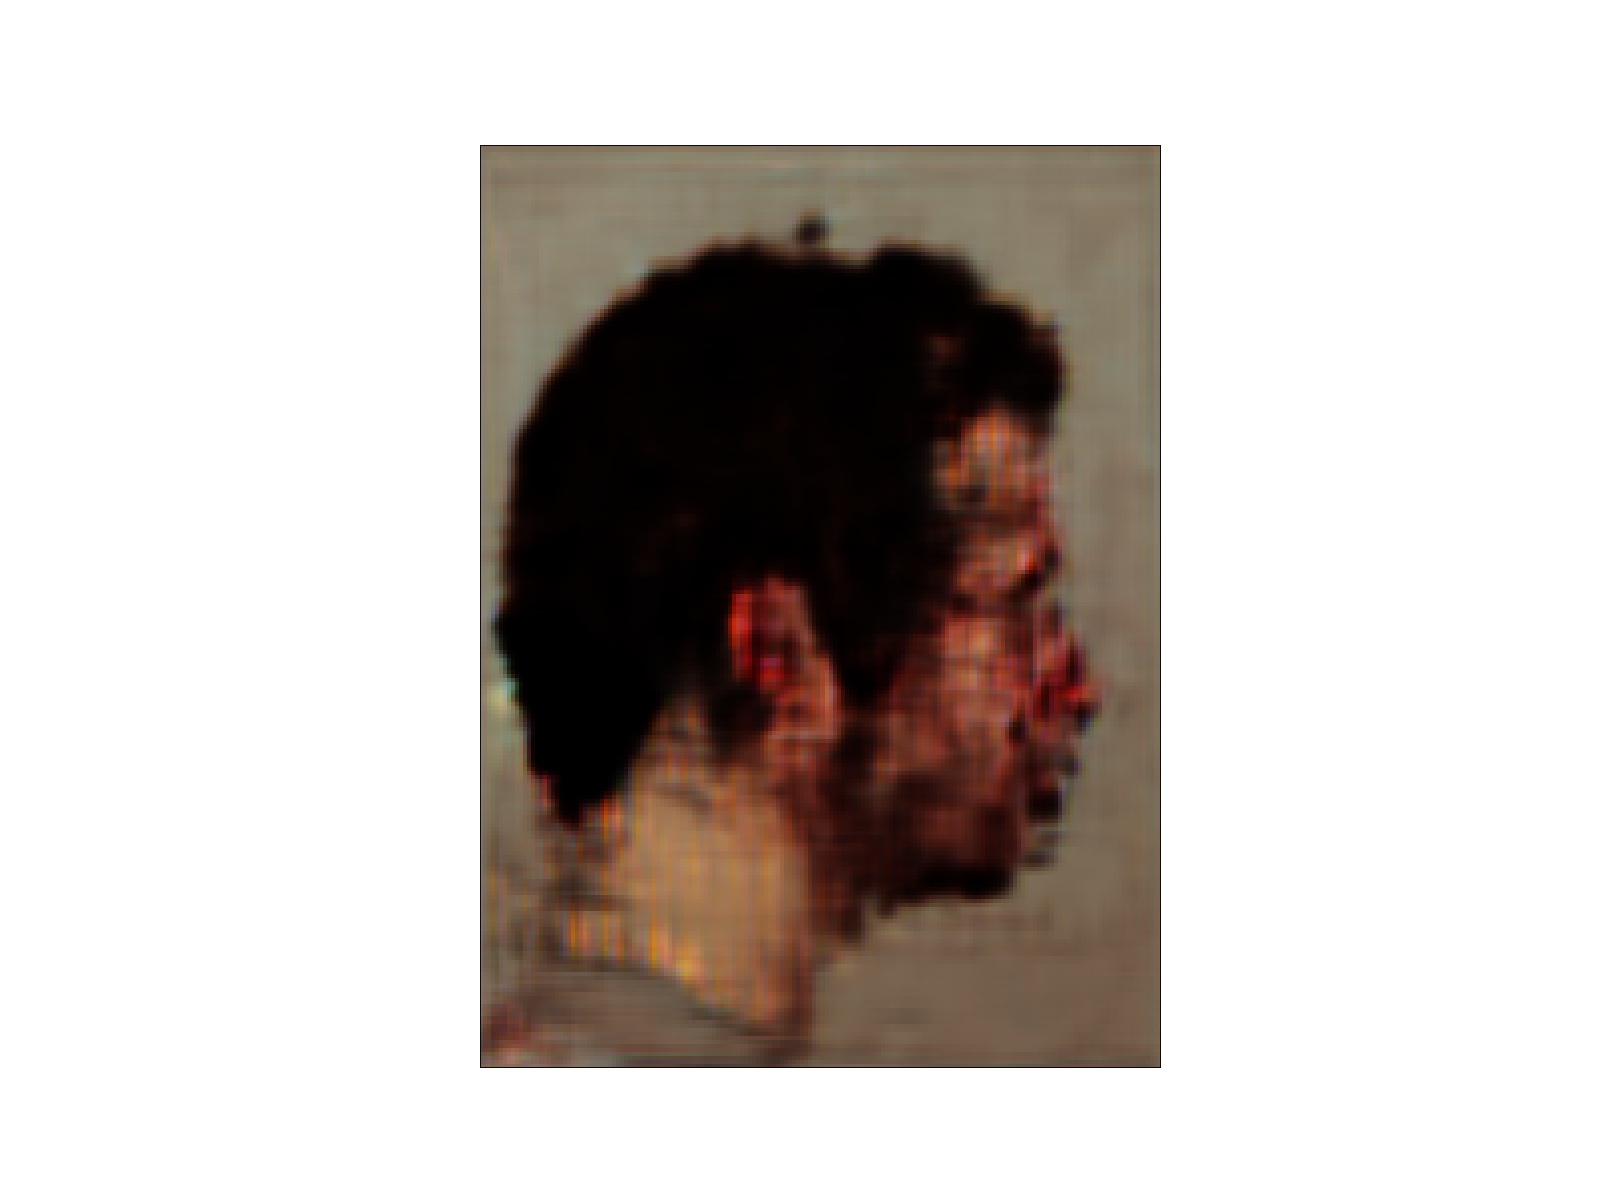

<IPython.core.display.Javascript object>


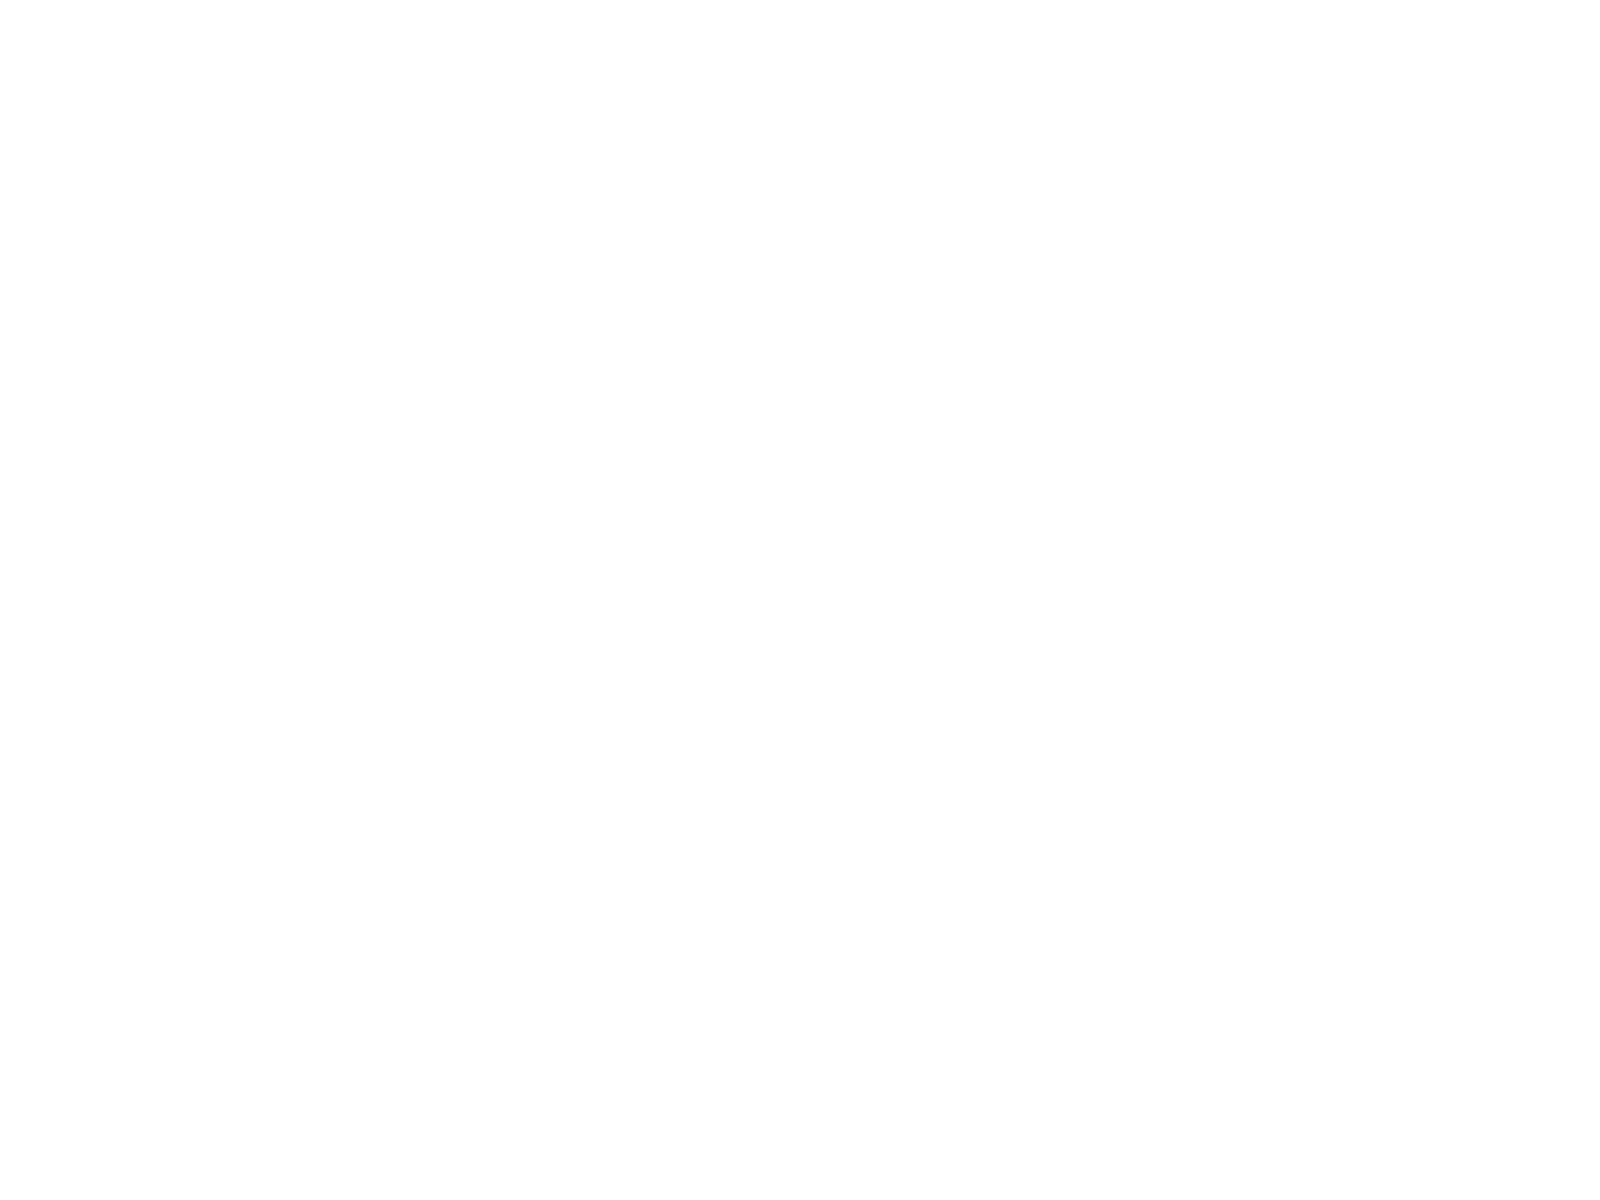

In [3]:
for c, i in enumerate(np.linspace(0, 2*math.pi, 80)):

    #       ['F', 'M', 'AF', 'AN', 'DI', 'HA', 'NE', 'SA', 'SU', 'FL', 'HL', 'S.', 'HR', 'FR']
    label = [[(math.sin(i)+1)/2*1.5-0.25,   (math.cos(i)+1)/2*1.5-0.25,    0,    0,    0,    0,    1,    0,    0,     0,    0,    0,    0,   1]]

    

    
    sample = specific_G_samples.eval(feed_dict={specific_z: z, specific_fake_label: label})
    sample = sample.reshape((model.image_size_y, model.image_size_x, 3))
    
    sample = cv2.resize(sample, dsize=(170, 230), interpolation=cv2.INTER_AREA)
    imageio.imwrite(im=sample, uri=f'animation_imgs/{c}.png')
    imgs.append([plt.imshow(sample, animated=True)])
    #plt.imshow(sample[0])
    #plt.show()

fig = plt.figure()
ani = animation.ArtistAnimation(fig, imgs, interval=50, blit=True,
                                repeat_delay=10)

plt.show()

In [ ]:
session.close()

In [2]:
tf.train.latest_checkpoint('./checkpoints/')

'./checkpoints/model.ckpt-36'

In [1]:
session.close()

NameError: name 'session' is not defined